In [26]:
from pyproj import Proj
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import json
with open('PB2002_boundaries.json', 'r') as f:
    plate_boundaries = json.load(f)

/tmp/ipykernel_1913677/2234152520.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


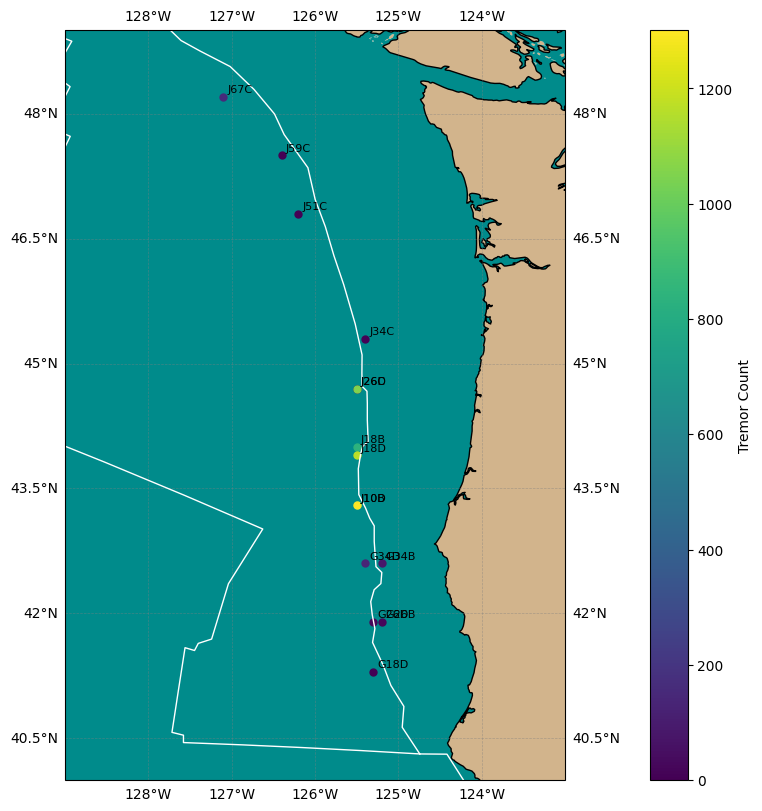

In [35]:
# write in stations
stations = [{"id": "J18B", "lat": 44.0, "lon": -125.5, "tremors": 835},
            {"id": "J10B", "lat": 43.3, "lon": -125.5, "tremors": 811},
            {"id": "G34B", "lat": 42.6, "lon": -125.2, "tremors": 84},
            {"id": "J67C", "lat": 48.2, "lon": -127.1, "tremors": 155},
            {"id": "J59C", "lat": 47.5, "lon": -126.4, "tremors": 3},
            {"id": "J26C", "lat": 44.7, "lon": -125.5, "tremors": 1},
            {"id": "J34C", "lat": 45.3, "lon": -125.4, "tremors": 7},
            {"id": "J51C", "lat": 46.8, "lon": -126.2, "tremors": 0},
            {"id": "J10D", "lat": 43.3, "lon": -125.5, "tremors": 1301},
            {"id": "J26D", "lat": 44.7, "lon": -125.5, "tremors": 1056},
            {"id": "J18D", "lat": 43.9, "lon": -125.5, "tremors": 1165},
            {"id": "G34D", "lat": 42.6, "lon": -125.4, "tremors": 135},
            {"id": "G26D", "lat": 41.9, "lon": -125.3, "tremors": 25},
            {"id": "G26B", "lat": 41.9, "lon": -125.2, "tremors": 25},
            {"id": "G18D", "lat": 41.3, "lon": -125.3, "tremors": 1}]


# create map
fig = plt.figure(figsize=[8,8],constrained_layout=True)
ax=fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-129, -123, 40, 49], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.add_feature(cfeature.LAND, facecolor='tan') 
ax.add_feature(cfeature.OCEAN, facecolor='darkcyan')

# get tremor values
tremor_values = [s["tremors"] for s in stations]
norm = colors.Normalize(vmin=min(tremor_values), vmax=max(tremor_values))
cmap = cm.get_cmap('viridis')

# colorbaaa
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) # dummy array
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Tremor Count')

# loop through stations
for station in stations:
    color = cmap(norm(station["tremors"]))
    ax.plot(station["lon"], station["lat"], marker='o', color= color, markersize=5, transform=ccrs.PlateCarree())
    ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=8, transform=ccrs.PlateCarree())


ax.coastlines()
# Plot tectonic plate boundaries from local file
for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        lons, lats = zip(*coords)
        ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())
    elif feature['geometry']['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())